In [1]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from functions import *
from Layer import Layer, Input
from utils import *

In [2]:
df = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.train')
df_test = get_data('/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/MONK/monks-1.test')

In [3]:
#df = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.train")
#df_test = get_data(r"\Users\s512fj-ej021t\OneDrive\Desktop\ML\monks-1.test")

In [4]:
X_train, y_train = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test, y_test = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

In [5]:
X_train = onehot_encoding(X_train)
X_test = onehot_encoding(X_test)

In [6]:
early_stopping = {'patience' : 150,
                  'monitor' : 'val_accuracy',
                  'verbose' : 0,
                  'compare_function': np.greater_equal}

reduce_eta = {'patience' : 75,
              'monitor' : 'val_accuracy',
              'factor' : 0.5,
              'verbose' : 0,
              'compare_function': np.greater_equal}

callbacks = {'early_stopping': None,
             'reduce_eta': None}

In [28]:
input_layer = Input(17)
hidden_layer = Layer(input_layer, 3, 'relu')
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy])
history = model.train(X_train, y_train.reshape((1,124)), epochs = 5000,
                                    eta = 0.5, lam = 0.0, alpha=0.5, n_batch = 93,
                                    validation_split = 0.25,
                                    early_stopping=early_stopping,
                                    reduce_eta=reduce_eta,
                                    use_opt = 0
                                    )

Epoch 0: train_loss: 7.099e-01, val_loss: 8.084e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 1: train_loss: 7.063e-01, val_loss: 8.018e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 2: train_loss: 7.026e-01, val_loss: 7.941e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 3: train_loss: 6.994e-01, val_loss: 7.852e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 4: train_loss: 6.969e-01, val_loss: 7.776e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 5: train_loss: 6.949e-01, val_loss: 7.713e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 6: train_loss: 6.936e-01, val_loss: 7.660e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 7: train_loss: 6.922e-01, val_loss: 7.618e-01; train_accuracy: 5.591e+01, val_accuracy: 3.226e+01  lr : 0.5
Epoch 8: train_loss: 6.910e-01, val_loss: 7.584e-01; train_accuracy: 5.591e+01, val_accu

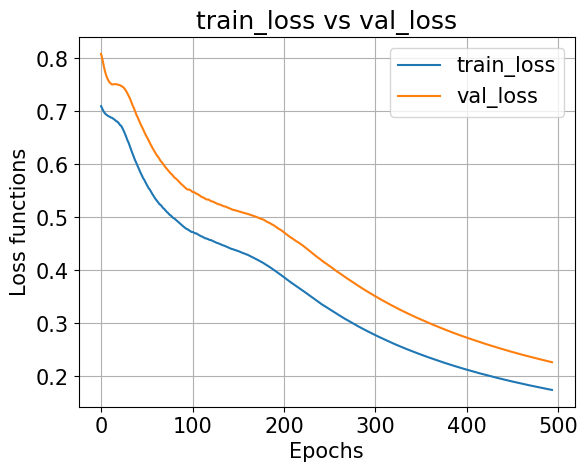

In [29]:
plt.plot(history['train_loss'],label='train_loss')
plt.plot(history['val_loss'], label='val_loss')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

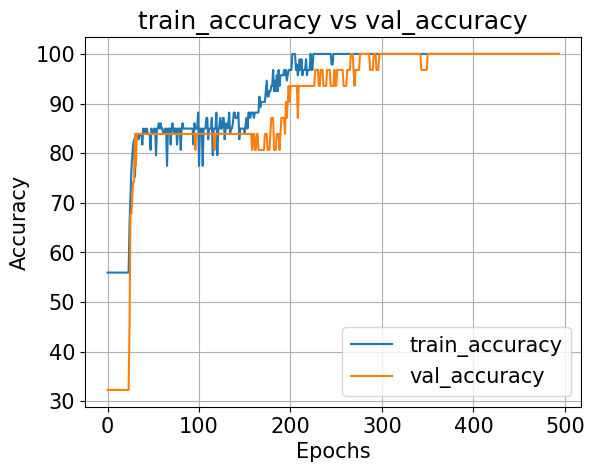

In [30]:
plt.plot(history['train_accuracy'],label='train_accuracy')
plt.plot(history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

In [10]:
y_pred = model.predict(X_test)

In [11]:
print(accuracy(y_pred, y_test.reshape(y_pred.shape)))

50.0


In [12]:
a = np.array([1,2,3]).reshape((1,3))
print(a.shape)

(1, 3)


In [13]:
np.mean(a,axis=0)

array([1., 2., 3.])

In [14]:
def prova(a):
    try:
        b = np.log(a)
        return b
    except RuntimeWarning: print('Impossibile')

In [15]:
prova(1-0.9999999999999999999999999999)

C:\Users\HP\AppData\Local\Temp\ipykernel_12244\4184142105.py:3: RuntimeWarning: divide by zero encountered in log
  b = np.log(a)


-inf